In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
all_results = pd.read_csv('all_results.csv')

In [3]:
all_results

,model,n_ratings,train_time,test_time,RMSE,MAE,Spearman,Coverage top 5,Coverage top 10,Coverage top 15,Coverage top 20
0,baseline,4311,0.019500,0.039100,0.841700,0.665200,0.262400,NaN,NaN,NaN,NaN
1,baseline,13932,0.058100,0.081200,0.842100,0.658900,0.290900,NaN,NaN,NaN,NaN
2,baseline,37100,0.242700,0.215100,0.843100,0.658500,0.283300,NaN,NaN,NaN,NaN
3,baseline,112959,0.929200,0.779200,0.846300,0.660700,0.285400,NaN,NaN,NaN,NaN
4,baseline,187770,1.398400,1.249500,0.856900,0.671800,0.290600,NaN,NaN,NaN,NaN
5,baseline,271422,2.107500,1.857200,0.858100,0.671000,0.297100,0.47,0.54,NaN,0.90
6,KNN-items,4311,0.007300,0.214600,0.560500,0.422200,0.781400,NaN,NaN,NaN,NaN
7,KNN-items,13932,0.028400,0.866500,0.576300,0.430100,0.757000,NaN,NaN,NaN,NaN
8,KNN-items,37100,0.067120,2.067000,0.581600,0.437600,0.763700,NaN,NaN,NaN,NaN
9,KNN-items,112959,0.214200,7.095000,0.587400,0.443400,0.760200,NaN,NaN,NaN,NaN


In [4]:
model_based_algos = ['SVD_suprise', 'NMF_surprise', 'Matrix Factorization']

In [5]:
model_based_results = all_results[all_results.model.isin(model_based_algos)]
model_based_results_grouped = model_based_results.groupby('model')

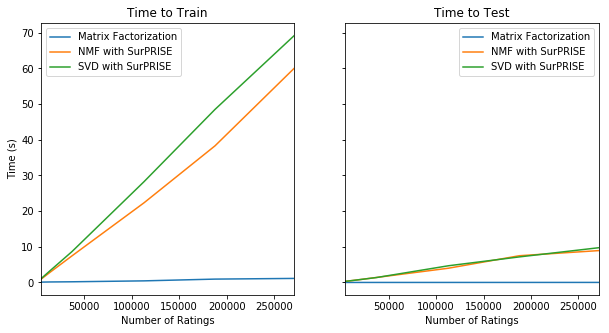

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
model_based_results_grouped.plot('n_ratings', 'train_time', ax=ax[0])
model_based_results_grouped.plot('n_ratings', 'test_time', ax=ax[1])
ax[0].legend(['Matrix Factorization', 'NMF with SurPRISE', 'SVD with SurPRISE'])
ax[1].legend(['Matrix Factorization', 'NMF with SurPRISE', 'SVD with SurPRISE'])
ax[0].set_ylabel('Time (s)')
ax[0].set_xlabel('Number of Ratings')
ax[1].set_xlabel('Number of Ratings')
ax[0].set_title('Time to Train')
ax[1].set_title('Time to Test')
plt.show()

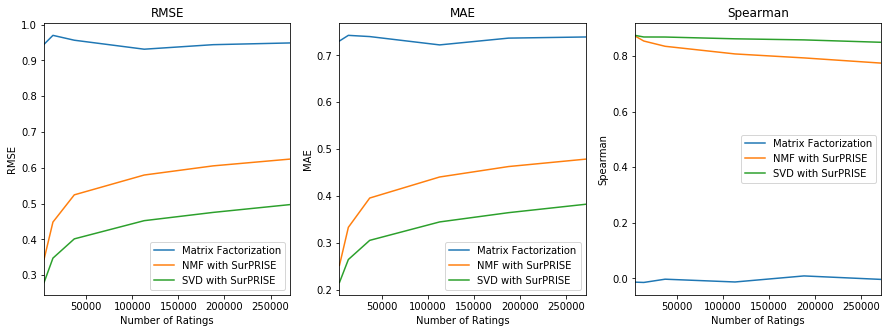

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
model_based_results_grouped.plot('n_ratings', 'RMSE', ax=ax[0])
model_based_results_grouped.plot('n_ratings', 'MAE', ax=ax[1])
model_based_results_grouped.plot('n_ratings', 'Spearman', ax=ax[2])
ax[0].legend(['Matrix Factorization', 'NMF with SurPRISE', 'SVD with SurPRISE'])
ax[1].legend(['Matrix Factorization', 'NMF with SurPRISE', 'SVD with SurPRISE'])
ax[2].legend(['Matrix Factorization', 'NMF with SurPRISE', 'SVD with SurPRISE'])
ax[0].set_ylabel('RMSE')
ax[1].set_ylabel('MAE')
ax[2].set_ylabel('Spearman')
ax[0].set_xlabel('Number of Ratings')
ax[1].set_xlabel('Number of Ratings')
ax[2].set_xlabel('Number of Ratings')
ax[0].set_title('RMSE')
ax[1].set_title('MAE')
ax[2].set_title('Spearman')
plt.show()

In [8]:
final_algos = ['baseline', 'KNN-users', 'SVD_suprise']

In [9]:
final_results = all_results[all_results.model.isin(final_algos)]
final_results_grouped = final_results.groupby('model')

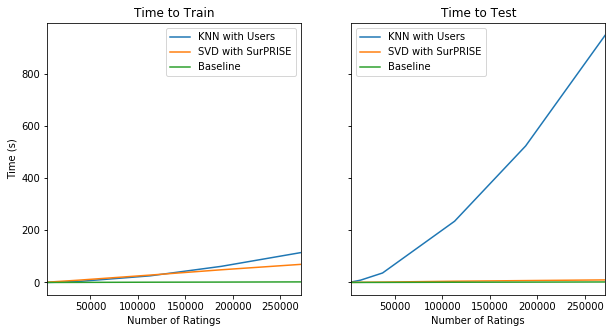

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
final_results_grouped.plot('n_ratings', 'train_time', ax=ax[0])
final_results_grouped.plot('n_ratings', 'test_time', ax=ax[1])
ax[0].legend(['KNN with Users', 'SVD with SurPRISE', 'Baseline'])
ax[1].legend(['KNN with Users', 'SVD with SurPRISE', 'Baseline'])
ax[0].set_ylabel('Time (s)')
ax[0].set_xlabel('Number of Ratings')
ax[1].set_xlabel('Number of Ratings')
ax[0].set_title('Time to Train')
ax[1].set_title('Time to Test')
plt.show()

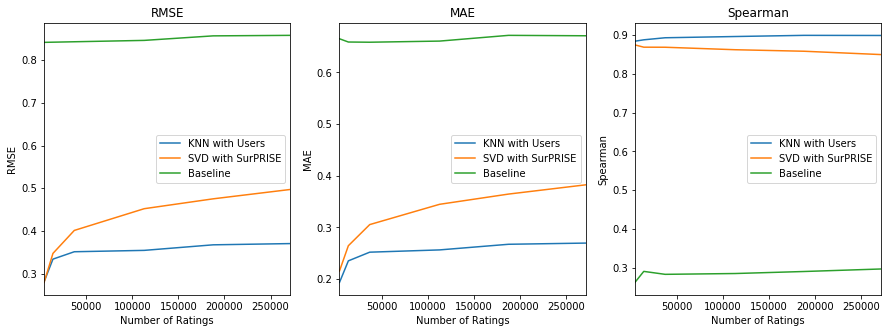

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
final_results_grouped.plot('n_ratings', 'RMSE', ax=ax[0])
final_results_grouped.plot('n_ratings', 'MAE', ax=ax[1])
final_results_grouped.plot('n_ratings', 'Spearman', ax=ax[2])
ax[0].legend(['KNN with Users', 'SVD with SurPRISE', 'Baseline'])
ax[1].legend(['KNN with Users', 'SVD with SurPRISE', 'Baseline'])
ax[2].legend(['KNN with Users', 'SVD with SurPRISE', 'Baseline'])
ax[0].set_ylabel('RMSE')
ax[1].set_ylabel('MAE')
ax[2].set_ylabel('Spearman')
ax[0].set_xlabel('Number of Ratings')
ax[1].set_xlabel('Number of Ratings')
ax[2].set_xlabel('Number of Ratings')
ax[0].set_title('RMSE')
ax[1].set_title('MAE')
ax[2].set_title('Spearman')
plt.show()

In [24]:
coverage = final_results[final_results.n_ratings == 271422][['model', 'Coverage top 5', 'Coverage top 10', 
                                                             'Coverage top 20']]
coverage.columns = ['model', 5, 10, 20]
coverage_melt = pd.melt(frame=coverage, id_vars='model')
coverage_group = coverage_melt.groupby('model')

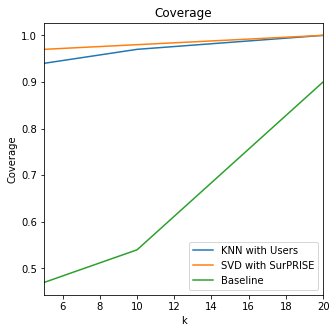

In [27]:
fig, ax = plt.subplots(1, figsize=(5, 5))
coverage_group.plot('variable', 'value', ax=ax)
ax.legend(['KNN with Users', 'SVD with SurPRISE', 'Baseline'])
ax.set_ylabel('Coverage')
ax.set_xlabel('k')
ax.set_title('Coverage')
plt.show()